In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Library yang digunakan 
- pandas
- numpy
- matplotlib
- tensorflow
- sklearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Dataset retrieved from 2017 National Hospital Ambulatory Medical Care Survey Data Files [https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/NHAMCS/]


The total number of data is 16709 data and 949



In [ ]:
full_df = pd.read_csv('/content/gdrive/MyDrive/Capstone/ed2017_data.csv',low_memory=False)
full_df = full_df.fillna(value=-1)
full_df.head()

,VMONTH,VDAYR,ARRTIME,WAITTIME,BLANK1,AGE,AGER,AGEDAYS,RESIDNCE,SEX,ETHUN,ETHIM,RACEUN,RACER,RACERETH,ARREMS,AMBTRANSFER,NOPAY,PAYPRIV,PAYMCARE,PAYMCAID,PAYWKCMP,PAYSELF,PAYNOCHG,PAYOTH,PAYDK,PAYTYPER,TEMPF,PULSE,RESPR,BPSYS,BPDIAS,POPCT,IMMEDR,PAINSCALE,SEEN72,RFV1,RFV2,RFV3,RFV4,...,RX29CAT3,RX29CAT4,RX29V1C1,RX29V1C2,RX29V1C3,RX29V1C4,RX29V2C1,RX29V2C2,RX29V2C3,RX29V2C4,RX29V3C1,RX29V3C2,RX29V3C3,RX29V3C4,DRUGID30,PRESCR30,CONTSUB30,COMSTAT30,RX30CAT1,RX30CAT2,RX30CAT3,RX30CAT4,RX30V1C1,RX30V1C2,RX30V1C3,RX30V1C4,RX30V2C1,RX30V2C2,RX30V2C3,RX30V2C4,RX30V3C1,RX30V3C2,RX30V3C3,RX30V3C4,SETTYPE,YEAR,CSTRATM,CPSUM,PATWT,EDWT
0,6,6,2056,72,-1.0,27,3,-7,1,2,2,2,1,1,1,2,-7,0,1,0,0,0,0,0,0,0,1,982,72,16,124,74,100,4,5,2,52200,-9,-9,-9,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3,2017,40100000,4,3723.12641,21.58043
1,6,2,1417,64,-1.0,1,1,-7,1,1,1,1,-9,1,3,2,-7,0,0,0,1,0,0,0,0,0,3,1014,151,24,-9,-9,98,4,-8,2,14400,10100,-9,-9,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3,2017,40100000,4,3723.12641,-1.00000
2,6,2,2303,-7,-1.0,52,4,-7,1,2,2,2,1,1,1,2,-7,0,1,0,0,0,0,0,0,0,1,973,124,16,100,60,98,3,-9,2,15451,-9,-9,-9,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3,2017,40100000,4,3723.12641,-1.00000
3,6,5,930,29,-1.0,5,1,-7,1,2,2,2,1,1,1,2,-7,0,1,0,0,0,0,0,0,0,1,983,81,22,-9,-9,99,4,-8,2,14400,-9,-9,-9,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3,2017,40100000,4,3723.12641,-1.00000
4,6,2,1332,20,-1.0,4,1,-7,1,1,2,2,1,1,1,2,-7,0,0,0,1,0,0,0,0,0,3,976,98,20,107,56,98,4,-9,2,55700,-9,-9,-9,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3,2017,40100000,4,3723.12641,-1.00000


In [ ]:
full_df.shape

(16709, 949)

In [ ]:
subset_df = full_df.iloc[:,:36].drop(columns=["BLANK1"])

In [ ]:
subset_df.corr()

## PREPROCESSING ##



The column used is

1.   WaitingTime
- -9 = Blank
- -7 = Not applicable (Not seen by PHYSICIAN/APRN/PA)

2.   Age

3. Sex
- 1 = Female
- 2 = Male

4. Tempf (Fahrenheit)
- -9 = Blank
- 0901-1080 = 90.1 – 108.0 Fahrenheit (reported range)

5. Immedr
- -9 = Blank
- -8 = Unknown
- 0 = ‘No triage’ reported for this visit but ESA does conduct nursing 
- 1 = Immediate
- 2 = Emergent
- 3 = Urgent
- 4 = Semi-urgent
- 5 = Nonurgent

6. Painscale
- -9 = Blank
- -8 = Unknown 
- 0-10






In [ ]:
subset_df = full_df[["WAITTIME","AGE","TEMPF","SEX","IMMEDR","PAINSCALE"]]
subset_df

,WAITTIME,AGE,TEMPF,SEX,IMMEDR,PAINSCALE
0,72,27,982,2,4,5
1,64,1,1014,1,4,-8
2,-7,52,973,2,3,-9
3,29,5,983,2,4,-8
4,20,4,976,1,4,-9
...,...,...,...,...,...,...
16704,8,24,970,2,3,10
16705,23,36,976,1,3,8
16706,96,40,971,2,3,3
16707,33,75,971,1,3,9


In [ ]:
subset_df.isnull().sum()

WAITTIME     0
AGE          0
TEMPF        0
SEX          0
IMMEDR       0
PAINSCALE    0
dtype: int64

In [ ]:
subset_df = subset_df[subset_df["WAITTIME"] != -9]
subset_df = subset_df[subset_df["WAITTIME"] != -7]
subset_df = subset_df[subset_df["WAITTIME"] != 0]

subset_df = subset_df[subset_df["AGE"] != 0]
subset_df = subset_df[subset_df["SEX"] != 0]
subset_df = subset_df[subset_df["IMMEDR"] != 0]
subset_df = subset_df[subset_df["PAINSCALE"] != 0]

In [ ]:
sexUniq = subset_df["SEX"].unique()
print(sexUniq)

[2 1]


In [ ]:
subset_df = subset_df[subset_df["TEMPF"] != -9]

subset_df = subset_df[subset_df["IMMEDR"] != -9]
subset_df = subset_df[subset_df["IMMEDR"] != -8]

subset_df = subset_df[subset_df["PAINSCALE"] != -9]
subset_df = subset_df[subset_df["PAINSCALE"] != -8]

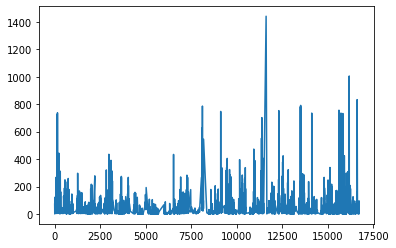

In [ ]:
plt.plot(subset_df["WAITTIME"])

We only take 5-45 minutes of waiting time

In [ ]:
subset_df = subset_df[subset_df["WAITTIME"] < 45]
subset_df = subset_df[subset_df["WAITTIME"] > 5]

In [ ]:
subset_df[["WAITTIME"]] == 0

Convert temperature from fahrenheit to celsius

In [ ]:
subset_df['TEMPF'] = subset_df['TEMPF'].apply(lambda x: (x*0.1 - 32) * 5/9 )
subset_df

,WAITTIME,AGE,TEMPF,SEX,IMMEDR,PAINSCALE
11,18,27,36.944444,1,4,5
14,9,44,36.777778,1,3,6
16,15,38,36.444444,1,4,6
21,12,40,37.444444,1,3,5
23,12,25,37.055556,1,4,8
...,...,...,...,...,...,...
16687,19,30,36.833333,2,4,7
16690,17,33,36.333333,2,4,7
16704,8,24,36.111111,2,3,10
16705,23,36,36.444444,1,3,8


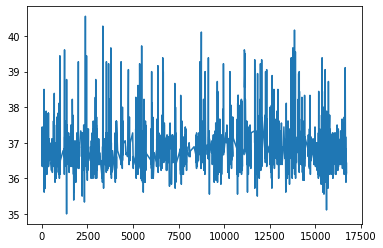

In [ ]:
plt.plot(subset_df["TEMPF"])

In [ ]:
subset_df = subset_df[subset_df["TEMPF"] > 34]
subset_df = subset_df[subset_df["TEMPF"] < 42]

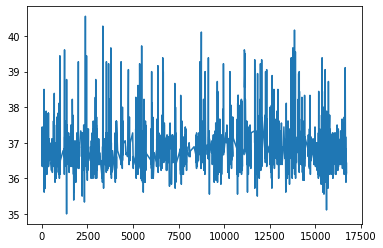

In [ ]:
plt.plot(subset_df["TEMPF"])

In [ ]:
subset_df

,WAITTIME,AGE,TEMPF,SEX,IMMEDR,PAINSCALE
11,18,27,36.944444,1,4,5
14,9,44,36.777778,1,3,6
16,15,38,36.444444,1,4,6
21,12,40,37.444444,1,3,5
23,12,25,37.055556,1,4,8
...,...,...,...,...,...,...
16687,19,30,36.833333,2,4,7
16690,17,33,36.333333,2,4,7
16704,8,24,36.111111,2,3,10
16705,23,36,36.444444,1,3,8


In [ ]:
def categorical_temp (x):
  if x <= 36.6 :
    x = 1
  elif x > 36.6:
    x = 2
  return x

def categorical_age (x):
  if x < 15:
    x = 1
  elif  x > 25 and x <= 15:
    x = 2
  elif x > 15 and x <=25:
    x= 3
  elif x > 45 and x <=35:
    x= 4
  elif x > 65 and x <=45:
    x= 5
  elif x > 75 and x <=65:
    x= 6
  return x


In [ ]:
subset_df["TEMPF"] = subset_df["TEMPF"].apply(categorical_temp)
subset_df["AGE"] = subset_df["AGE"].apply(categorical_temp)

Feature : Sex, Age, Tempf, Immedr, Painscale

Target : Waitingtime

In [ ]:
X = subset_df[["AGE","SEX","IMMEDR","PAINSCALE","TEMPF"]] 

y = subset_df["WAITTIME"]

In [ ]:
#Split Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape


((3416, 5), (855, 5))

In [ ]:
stdscal = StandardScaler()
scale = stdscal.fit_transform(X_train)

In [ ]:
X_train = pd.DataFrame(scale,columns=list(X_train.columns.values))
X_train

,AGE,SEX,IMMEDR,PAINSCALE,TEMPF
0,0.976849,1.134906,-0.455715,0.538588,0.627469
1,0.976849,-0.881131,3.627492,-0.267465,0.627469
2,0.976849,1.134906,0.565087,0.135561,-1.593705
3,0.976849,1.134906,-0.455715,-1.879572,0.627469
4,-1.023700,1.134906,-0.455715,0.135561,0.627469
...,...,...,...,...,...
3411,-1.023700,1.134906,1.585889,0.135561,0.627469
3412,-1.023700,-0.881131,0.565087,1.344642,0.627469
3413,0.976849,1.134906,-0.455715,0.538588,0.627469
3414,-1.023700,-0.881131,0.565087,-1.073519,0.627469


In [ ]:
stdscal = StandardScaler()
scale = stdscal.fit_transform(X_test)

In [ ]:
X_test = pd.DataFrame(scale,columns=list(X_test.columns.values))
X_test

,AGE,SEX,IMMEDR,PAINSCALE,TEMPF
0,1.017700,-0.788918,-0.447840,1.380843,-1.512766
1,-0.982607,-0.788918,0.551907,0.963957,-1.512766
2,-0.982607,1.267560,-1.447586,-0.703586,-1.512766
3,-0.982607,-0.788918,1.551653,0.547071,0.661041
4,-0.982607,-0.788918,0.551907,-1.120472,-1.512766
...,...,...,...,...,...
850,-0.982607,-0.788918,0.551907,-1.537358,0.661041
851,1.017700,-0.788918,-0.447840,1.380843,0.661041
852,-0.982607,1.267560,-0.447840,0.547071,0.661041
853,1.017700,-0.788918,-0.447840,0.963957,0.661041


## TensorFlow


In [ ]:
model = Sequential()
input_layer = Input(shape=(X.shape[1],))
model.add(Dense(64, activation="relu",input_shape =(X.shape[1],) ))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(1))

model.compile(loss="mean_squared_error" , optimizer="Adam", metrics=["mean_squared_error"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
1068/1068 [==============================] - 5s 3ms/step - loss: 403.8065 - mean_squared_error: 403.8065 - val_loss: 368.8416 - val_mean_squared_error: 368.8416
Epoch 2/100
1068/1068 [==============================] - 3s 2ms/step - loss: 306.7173 - mean_squared_error: 306.7173 - val_loss: 281.0571 - val_mean_squared_error: 281.0571
Epoch 3/100
1068/1068 [==============================] - 3s 3ms/step - loss: 237.5736 - mean_squared_error: 237.5736 - val_loss: 222.7686 - val_mean_squared_error: 222.7686
Epoch 4/100
1068/1068 [==============================] - 3s 3ms/step - loss: 188.4846 - mean_squared_error: 188.4846 - val_loss: 180.0553 - val_mean_squared_error: 180.0553
Epoch 5/100
1068/1068 [==============================] - 3s 3ms/step - loss: 153.6253 - mean_squared_error: 153.6253 - val_loss: 150.2860 - val_mean_squared_error: 150.2860
Epoch 6/100
1068/1068 [==============================] - 3s 3ms/step - loss: 130.7400 - mean_squared_error: 130.7400 - val_loss: 131.57

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

10.155195354884865
9.775545911139782


In [ ]:
pred_train

array([[14.998022],
       [12.349526],
       [15.71028 ],
       ...,
       [14.998022],
       [15.729901],
       [15.726516]], dtype=float32)

In [ ]:
pred = model.predict([[2,3,4,2,2]])
pred

array([[15.729845]], dtype=float32)

save model result

In [ ]:
model.save('myModel.h5')

In [ ]:
load_model = tf.keras.models.load_model("/content/myModel.h5")


In [ ]:
pred_result = load_model.predict([[2,3,4,2,2]])
pred_result

array([[15.729845]], dtype=float32)